In [47]:
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import seaborn as sns

In [48]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

In [49]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
# Convert to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Dataset

In [51]:
class IrisDataset(Dataset):
    def __init__(self, X_train, y_train) -> None:
        super().__init__()
        self.X = torch.from_numpy(X_train)
        self.y = torch.from_numpy(y_train)
        self.y = self.y.type(torch.LongTensor)
        self.len = self.X.shape[0]

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

### DataLoader

In [52]:
iris_data = IrisDataset(X_train, y_train)
train_loader = DataLoader(iris_data, batch_size=32, shuffle=True)

In [53]:
print(f"X shape: {iris_data.X.shape}, y shape: {iris_data.y.shape}")

X shape: torch.Size([120, 4]), y shape: torch.Size([120])


### Network

In [54]:
class MultiClassNet(nn.Module):
    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN_FEATURES):
        super().__init__()
        self.linear1 = nn.Linear(NUM_FEATURES, HIDDEN_FEATURES)
        self.linear2 = nn.Linear(HIDDEN_FEATURES, NUM_CLASSES)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.sigmoid(x)
        x = self.linear2(x)
        x = self.log_softmax(x)
        return x

### Hyperparameters

In [55]:
NUM_FEATURES = iris_data.X.shape[1]
HIDDEN = 6
NUM_CLASSES = len(iris_data.y.unique())


### Create model instance

In [56]:
model = MultiClassNet(NUM_FEATURES, NUM_CLASSES, HIDDEN)

In [57]:
# Define loss function
criterion = nn.CrossEntropyLoss()

In [58]:
# Optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Trainning loop

In [59]:
NUM_EPOCHS = 1001
losses = []
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    num_batches = 0

    for i, (X_batch, y_batch) in enumerate(train_loader):
        # set gradient to zero
        optimizer.zero_grad()

        # forward pass
        y_pred = model(X_batch)

        # compute loss
        loss = criterion(y_pred, y_batch)

        # backward
        loss.backward()

        # update weights
        optimizer.step()

    
        running_loss += loss.item()
        num_batches += 1
    
    # Loss trung bình của epoch
    epoch_loss = running_loss / num_batches
    losses.append(epoch_loss)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Average Loss: {epoch_loss:.4f}')

Epoch 0, Average Loss: 1.0775
Epoch 10, Average Loss: 1.0423
Epoch 20, Average Loss: 1.0201
Epoch 30, Average Loss: 0.9988
Epoch 40, Average Loss: 0.9765
Epoch 50, Average Loss: 0.9554
Epoch 60, Average Loss: 0.9341
Epoch 70, Average Loss: 0.9119
Epoch 80, Average Loss: 0.8938
Epoch 90, Average Loss: 0.8696
Epoch 100, Average Loss: 0.8503
Epoch 110, Average Loss: 0.8338
Epoch 120, Average Loss: 0.8062
Epoch 130, Average Loss: 0.7917
Epoch 140, Average Loss: 0.7732
Epoch 150, Average Loss: 0.7527
Epoch 160, Average Loss: 0.7386
Epoch 170, Average Loss: 0.7177
Epoch 180, Average Loss: 0.7000
Epoch 190, Average Loss: 0.6873
Epoch 200, Average Loss: 0.6717
Epoch 210, Average Loss: 0.6599
Epoch 220, Average Loss: 0.6529
Epoch 230, Average Loss: 0.6418
Epoch 240, Average Loss: 0.6296
Epoch 250, Average Loss: 0.6208
Epoch 260, Average Loss: 0.6044
Epoch 270, Average Loss: 0.5997
Epoch 280, Average Loss: 0.5881
Epoch 290, Average Loss: 0.5868
Epoch 300, Average Loss: 0.5748
Epoch 310, Average 

<Axes: >

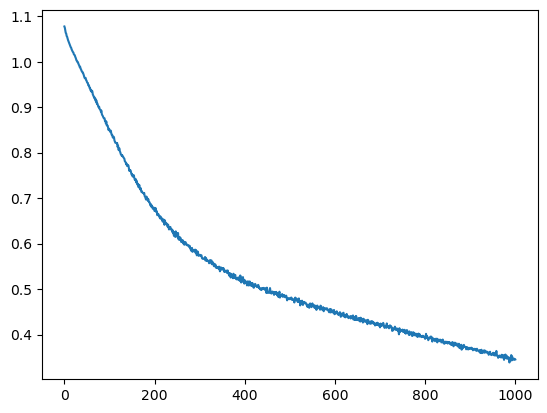

In [60]:
sns.lineplot(x=range(NUM_EPOCHS), y=losses)

In [63]:
len(losses)

1001

### Model evaluation

In [64]:
X_test_torch = torch.from_numpy(X_test)
with torch.no_grad():
    y_test_log = model(X_test_torch)
    y_test_pred = torch.max(y_test_log.data, 1)

In [65]:
accuracy_score(y_test, y_test_pred.indices)

0.9333333333333333

In [66]:
from collections import Counter
Counter(y_test)

Counter({1: 11, 2: 10, 0: 9})